# Modelado

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import linear_model 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
#oversampling libraries and methods
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,plot_confusion_matrix,classification_report

In [2]:
df_2018 = pd.read_pickle("./df_2018.pkl")  
df_2018  

,FLAG_ANDALUCIA,FLAG_LIFE,FLAG_CATALUNYA,FLAG_MADRID,FLAG_MODELO_4,FLAG_VENTA_VN_FLOTA,FLAG_AFECTADO_EMI,FLAG_CLIENTE_LABORAL,FLAG_HOMBRE,FLAG_CLIENTE_PARTICULAR,FLAG_EMPRESA,FLAG_DIESEL,DIAS_RELACION_2018,PESO_VEHICULO_SLI,NUM_OPCIONALES_SLI,POTENCIA_CV,IMPORTE_TOTAL_ORS_2018,NUM_ORS_2018,FLAG_TERMINA_RELACION_2019
1924,0,0,1,0,0,0,0,0,0,1,0,1,1663,1517.0,9.0,75.0,1121.08,3.0,1.0
2346,0,0,0,0,0,0,0,0,1,1,0,0,6698,1135.0,2.0,60.0,1121.88,1.0,1.0
2351,0,0,0,0,0,0,0,0,1,1,0,1,6612,1175.0,5.0,90.0,0.00,0.0,1.0
2480,0,0,0,1,0,0,0,0,0,0,1,1,6522,1109.0,2.0,64.0,0.00,0.0,1.0
2512,0,0,1,0,0,0,0,0,1,1,0,0,6500,1135.0,2.0,60.0,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114257,0,0,0,1,0,0,1,0,0,1,1,1,309,1472.0,14.0,75.0,0.00,0.0,0.0
114258,0,0,0,1,0,0,1,0,0,1,1,1,309,1472.0,14.0,75.0,0.00,0.0,0.0
114259,0,0,0,1,0,0,1,0,0,1,1,1,309,1472.0,14.0,75.0,0.00,0.0,0.0
114260,0,0,0,1,0,0,1,0,0,1,1,1,309,1472.0,14.0,75.0,0.00,0.0,0.0


### Regresión logística

In [3]:
# La X té totes les dades excepte la columna a predir
# La y té només la columna a predir 
X = df_2018.drop('FLAG_TERMINA_RELACION_2019',axis=1)
y = df_2018['FLAG_TERMINA_RELACION_2019']


# Dividim en train/test amb un 30% pel test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=9,stratify=y)

# Creem un objecte LogisticRegression i l'entrenem amb
# les dades de traines
regr = LogisticRegression(max_iter=500, C=1)
regr.fit(X_train,y_train)

# Amb el model creat, guardem les prediccions sobre les dades
# de test
y_pred = regr.predict(X_test)

# Amb la columna de test amb els valors reals i les nostres
# prediccions, podem obtenir un report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      9629
         1.0       0.00      0.00      0.00      1240

    accuracy                           0.89     10869
   macro avg       0.44      0.50      0.47     10869
weighted avg       0.78      0.89      0.83     10869



C:\Users\pcarol\Anaconda3\envs\pandas_playground\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pcarol\Anaconda3\envs\pandas_playground\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pcarol\Anaconda3\envs\pandas_playground\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

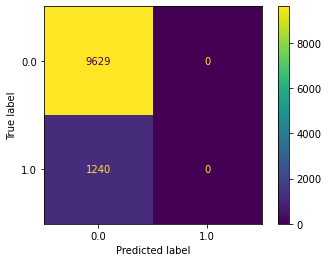

In [4]:
cm = confusion_matrix(y_test, y_pred, labels=regr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=regr.classes_)
disp.plot()

## Over sample

In [5]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

print(sorted(Counter(y_resampled).items()))

[(0.0, 22469), (1.0, 22469)]


In [6]:
X_resampled.shape

(44938, 18)

In [7]:
y_resampled.shape

(44938,)

## Repetim model amb noves variables

In [8]:
# Dividim en train/test amb un 30% pel test
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=9,stratify=y_resampled)

# Creem un objecte LogisticRegression i l'entrenem amb
# les dades de train
regr = LogisticRegression(max_iter=500,C=1)
regr.fit(X_train,y_train)

# Amb el model creat, guardem les prediccions sobre les dades
# de test
y_pred = regr.predict(X_test)

# Amb la columna de test amb els valors reals i les nostres
# prediccions, podem obtenir un report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.57      0.59      6741
         1.0       0.59      0.62      0.60      6741

    accuracy                           0.60     13482
   macro avg       0.60      0.60      0.59     13482
weighted avg       0.60      0.60      0.59     13482



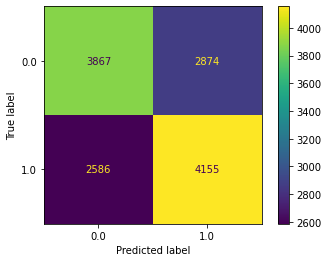

In [9]:
cm = confusion_matrix(y_test, y_pred, labels=regr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=regr.classes_)
disp.plot()

In [10]:
regr = LogisticRegression(max_iter=500,C=0.00001)
regr.fit(X_train,y_train)

# Amb el model creat, guardem les prediccions sobre les dades
# de test
y_pred = regr.predict(X_test)

# Amb la columna de test amb els valors reals i les nostres
# prediccions, podem obtenir un report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.46      0.52      6741
         1.0       0.56      0.70      0.62      6741

    accuracy                           0.58     13482
   macro avg       0.58      0.58      0.57     13482
weighted avg       0.58      0.58      0.57     13482



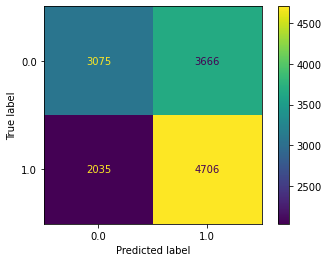

In [11]:
cm = confusion_matrix(y_test, y_pred, labels=regr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=regr.classes_)
disp.plot()

In [14]:
regr.coef_

array([[-4.29986438e-03,  1.16116725e-04, -1.10988854e-03,
         5.93522220e-03, -6.46319795e-04, -2.82377824e-04,
         5.82781774e-03, -1.31052836e-03, -5.09108112e-03,
        -8.21873357e-04,  7.57191116e-03,  1.26396742e-04,
        -1.69552850e-04,  2.34950911e-04, -1.11414614e-02,
         3.97554587e-04,  5.03765182e-05, -1.16653160e-04]])